In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
from efn.util.plot_util import EFN_model_df, find_last_ind, get_latest_diagnostics
from efn.util.efn_util import setup_IO, find_convergence, model_opt_hps

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

basedir = '/Users/sbittner/Documents/dsn/dsn/';

D = 4;
nlayers = 10;
sigma_init = 100.0;
        
resdir = basedir + 'results/inits/D=%d_M_%dP_sigma=%.2f/' % (D, nlayers, sigma_init);

wsize = 50
delta_thresh = 1e-10
if (sigma_init >= 100.0):
    min_iters = 200000;
else:
    min_iters = 50000;
    
check_rate = 100;
min_checks = np.int(min_iters // check_rate);

fname = resdir + 'results.npz';
try:
    npzfile = np.load(fname);
except:
    print('Error! Issue reading %s' % resdir);

train_elbos = npzfile['train_elbos'];
last_ind = find_last_ind(train_elbos);
mean_train_elbos = np.mean(train_elbos, 1);
ind = find_convergence(mean_train_elbos, last_ind+1, wsize, delta_thresh);
print('last ind before zeros', last_ind);
print('convergence ind', ind);
if (ind is None or (not npzfile['converged'])):
    print('Hasnt converged: %s' % fname);
    ind = mean_train_elbos.shape[0];
else:
    print('%s was fine' % resdir);
    ind = max(ind, min_checks);
final_ind = ind;

elbos, R2s, KLs, status = get_latest_diagnostics(fname, is_train=True, ind=ind);


diagnostic_str = 'train';

mean_KLs = np.mean(npzfile['%s_KLs' % diagnostic_str], 1)[:ind];
std_KLs = np.std(npzfile['%s_KLs' % diagnostic_str], 1)[:ind];

mean_elbos = np.mean(npzfile['%s_elbos' % diagnostic_str], 1)[:ind];
std_elbos = np.std(npzfile['%s_elbos' % diagnostic_str], 1)[:ind];

mean_R2s = np.mean(npzfile['%s_R2s' % diagnostic_str], 1)[:ind];
std_R2s = np.std(npzfile['%s_R2s' % diagnostic_str], 1)[:ind];
check_rate = npzfile['check_rate'];
print(mean_KLs.shape, mean_elbos.shape, mean_R2s.shape);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
last ind before zeros 2001
convergence ind 99
/Users/sbittner/Documents/dsn/dsn/results/inits/D=4_M_10P_sigma=100.00/ was fine
(2000,) (2000,) (2000,)


/Users/sbittner/anaconda/envs/dsn/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/sbittner/anaconda/envs/dsn/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/Users/sbittner/anaconda/envs/dsn/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/sbittner/anaconda/envs/dsn/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


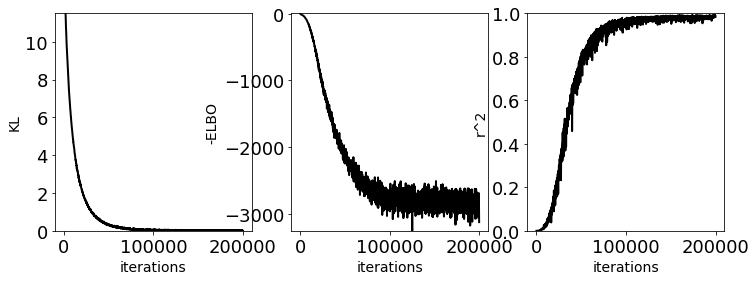

In [3]:
fontsize = 14;
its = np.arange(0, check_rate*final_ind, check_rate);

# plot diagnostics throughout training
plt.figure(figsize=(12,4));
# KL
plt.subplot(1,3,1);
plt.plot(its, mean_KLs, 'k', lw=2);
min_val = np.min(mean_KLs-std_KLs);
max_val = mean_KLs[20];
plt.ylim([min_val, max_val])
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('KL', fontsize=fontsize);

# ELBO
plt.subplot(1,3,2);
plt.plot(its, -mean_elbos, 'k', lw=2);
min_val = np.min(mean_elbos-std_elbos);
max_val = np.max(mean_elbos);
plt.ylim([-max_val, -min_val])
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('-ELBO', fontsize=fontsize);


# r2
plt.subplot(1,3,3);
plt.plot(its, mean_R2s,'k', lw=2);
min_val = max(np.min(mean_R2s-std_R2s), 0);
plt.ylim([min_val, 1])
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('r^2', fontsize=fontsize);
plt.show();


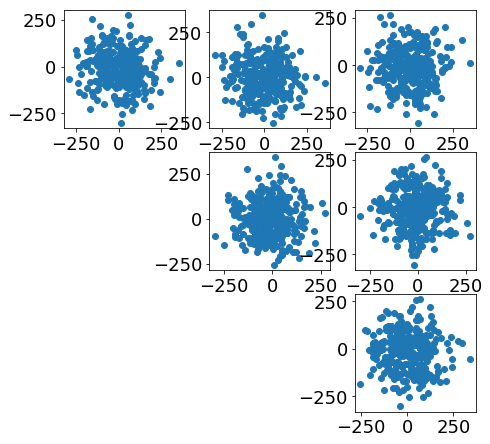

In [4]:
# visualze samples at the end
Z = npzfile['Z'];
n_viz = 300;

plt.figure(figsize=(10,10));
for i in range(D):
    for j in range(i+1,D):
        ind = D*i + j + 1;
        plt.subplot(D,D,ind);
        plt.scatter(Z[0,:n_viz,i,0], Z[0,:n_viz,j,0]);
plt.show();
        